**Project Name**: HR Analytics - Predicting Employee Turnover

**Author**: Ankur Dhamija

**Connect on Linkedin**: https://www.linkedin.com/in/ankurdhamija/

--------

# HR Analytics - Predicting Employee Turnover

-------

## 1. Executive summary

------

## 2. Business problem and motivation

-----

## 3. Load the required libraries

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import sys
import os

In [2]:
# getting the name of the directory
# where the this file is present.
current = os.path.dirname(os.path.realpath("ml_utils.py"))
  
# Getting the parent directory name
# where the current directory is present.
parent = os.path.dirname(current)
  
# adding the parent directory to 
# the sys.path.
sys.path.append(parent)

In [3]:
from ml_utils import *

In [4]:
#Display settings
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [282]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")


-------

## 4. Load the dataset

In [283]:
df = pd.read_csv("data/HR-Dataset.csv", index_col=None)

In [284]:
#Visualize the dataframe
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


--------

## 5. Overview of the dataset

**Shape of the Dataset:**

(14999, 10)
-----------------




**Number of rows and columns in the Dataset:**

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')
-----------------




**Basic information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
-----------------




**Percentage null values in the Dataset:**

salary                   0.0
sales                    0.0
promotion_last_5years    0.0
left                     0.0
Work_accident            0.0
time_spend_company       0.0
average_montly_hours     0.0
number_project           0.0
last_evaluation          0.0
satisfaction_level       0.0
dtype: float64
-----------------




**Total number of duplicated rows in the Dataset:**

3008
-----------------




**Categorical columns in the Dataset:**

['sales', 'salary']
-----------------




**Unique values across categorical columns in the Dataset:**

Unique values in the column:  sales
{'sales': 4140, 'technical': 2720, 'support': 2229, 'IT': 1227, 'product_mng': 902, 'marketing': 858, 'RandD': 787, 'accounting': 767, 'hr': 739, 'management': 630}
-----------------


Unique values in the column:  salary
{'low': 7316, 'medium': 6446, 'high': 1237}
-----------------


-----------------




**Visual representation of the Dataset:**

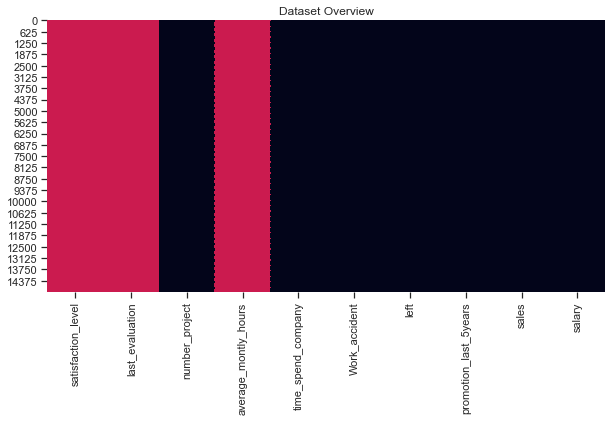

 Categorical   Numerical   NaN 


In [285]:
#Get an overview of the Dataset
df_overview(df, max_cat=20, figsize=(10,5))

-----

## 6. Data manipulation

### 6.1 Rename columns

In [286]:
# Renaming columns with a better description
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

### 6.2 Move target variable to the beginning of the dataset

In [287]:
# Moving the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### 6.3 Check and remove duplicates

In [288]:
# Earlier, we saw that there were duplicate rows in the dataset.
# Let's visualize the duplicate rows
duplicate = checkDuplicates(df)

Number of duplicate rows in the dataframe:  3008


In [289]:
df['turnover'].value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [290]:
#Remove duplicates
df.drop_duplicates(inplace=True)

-----

## 7. Dataset Overview - Exploratory Data Analysis

Let's explore the dataset and try to find some insights in the dataset. Some initial questions that can be explored 
- Turnover percentage across the firm
- Employee Attrition by years at company

## 7.1 -> There is 16.6% attrition rate at the firm

In [291]:
# Turnover Percentage across the firm
'{:.2%}'.format(df['turnover'].sum()/df['turnover'].count())

'16.60%'

**Key Findings** <br/>
There is a `16.60%` `Employee attrition` at the firm.

-------

## 7.2 ->  Attrition rate is maximum for employees with 5 years of experience at the firm

### Key Findings
- We see that maximum attrition is when employees have spent 5 years with the firm. 
- Another interesting thing to note is that attrition rises gradually from 2 years duration and peaks at 5 years.
- Attrition falls sharply after has employee has spent more than 5 years with the firm

May be its the case that there is some `retention bonus paid at 5 years employment` and few employees
`leave immediately after taking the the bonus`.

Or it could also be the case that the retention bonus is `conditional`. 
Employees who don't get the `bonus leave` and those who get the bonus `continue to stay` with the firm.

### Key takeaways for the HR Department
- Why attrition is rising gradually for employees in 2-5 years range?
- 70% of the total attrition comes from employees in 4-5 years range
- Can we use some retention policies that we have for employees in >6 years range to lower retention in 4-5 years range?

In [318]:
#Calculate attrition rate by number of years spent at the firm
attritionRate = df.groupby('yearsAtCompany')['turnover'].sum()/df.groupby('yearsAtCompany')['turnover'].count()

In [319]:
#View attrition rate
attritionRate

yearsAtCompany
2     0.010653
3     0.168401
4     0.246883
5     0.453861
6     0.201107
7     0.000000
8     0.000000
10    0.000000
Name: turnover, dtype: float64

<AxesSubplot:xlabel='yearsAtCompany', ylabel='turnover'>

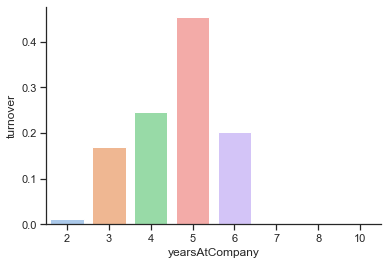

In [321]:
#Attrition rate by years spent at the firm
sns.barplot(x=attritionRate.index, y=attritionRate)

-------

### 7.3 ->  Employees with 3 to 5 years of experience reported lower satisfaction levels on average

### Key findings
- Average satisfaction levels dip for employees during 2 - 4 years stay at the firm
- Low satisfaction levels could be the reason for higher attrition rate in the employees with 2 - 5 years of stay bracket.

### Key takeaways for the HR Department
- Why average satisfaction levels are low for employees in the 2-4 years range?
- Could low satisfaction levels be the reason for high attrition in the 2-4 years range?

In [322]:
#Average satisfaction levels by years spent at the firm
avgSatisfactionLevels = df.groupby('yearsAtCompany')['satisfaction'].mean()
avgSatisfactionLevels

yearsAtCompany
2     0.699165
3     0.648988
4     0.516090
5     0.583183
6     0.571107
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction, dtype: float64

In [323]:
#Create a Dataframe to visualize the trend between Emp Satisfaction levels and attrition rate
tempDf = pd.DataFrame({"avgSatisfactionLevels": avgSatisfactionLevels, 
        "attritionRate": attritionRate})

<AxesSubplot:xlabel='yearsAtCompany'>

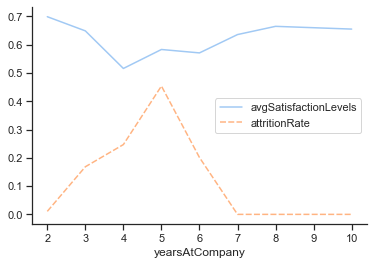

In [325]:
#View attrition rate and average satisfaction levels by years spent at the firm
sns.lineplot(data=tempDf)

------

### 7.4 ->  As expected, attrition rate is high for employees with low salaries

### Key findings
- Nearly 20% attrition rate in employees with low salaries
- Certain high salaries staff is also leaving the company

### Key takeaways for the HR Department
- Benchmark salaries of low salaries staff to check whether salary can be improved for certain staff
- 

In [315]:
#Calculate attrition rate by salary
attritionRateBySalary = df.groupby('salary')['turnover'].sum()/df.groupby('salary')['turnover'].count()

In [316]:
attritionRateBySalary

salary
high      0.048485
low       0.204530
medium    0.146170
Name: turnover, dtype: float64

<AxesSubplot:xlabel='salary', ylabel='turnover'>

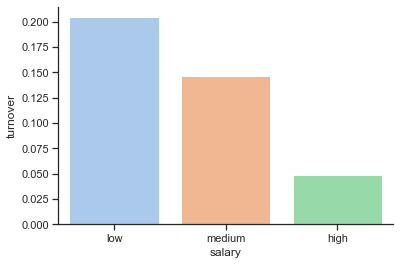

In [317]:
#Plot attrition rate by salary
sns.barplot(x=attritionRateBySalary.index, y=attritionRateBySalary, order=["low","medium","high"])

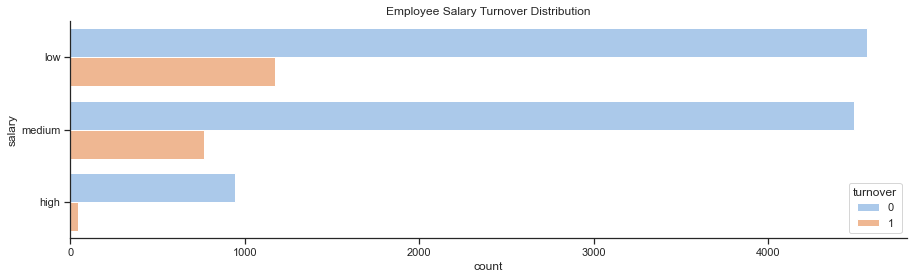

In [335]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

-------

In [ ]:
### 7.5 

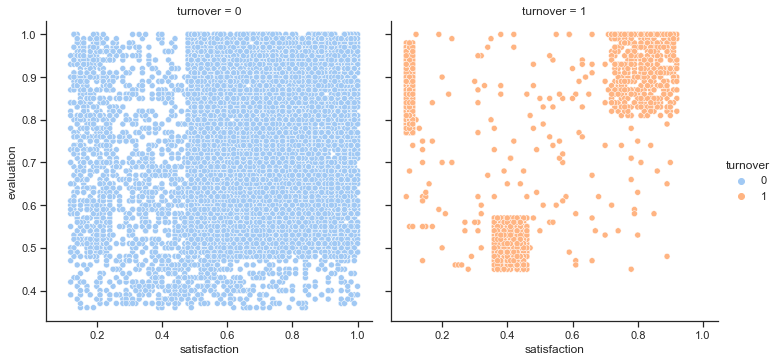

In [334]:
#Visualize scatter plot of satisfaction and evaluation 

#We create this scatterplot to understand how the combination of rating/evaluation effects employee turnover
sns.relplot(x="satisfaction", y="evaluation", col="turnover", hue="turnover", data=df, kind="scatter")

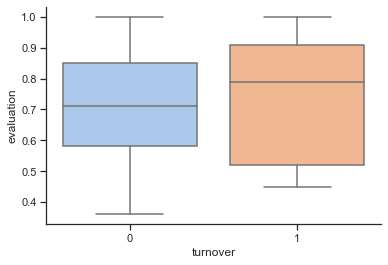

In [327]:
ax = sns.boxplot(x="turnover", y="evaluation", data=df)

In [251]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [253]:
avgEvaluation = df.groupby('turnover')['averageMonthlyHours'].mean()
avgEvaluation

turnover
0    198.94270
1    208.16223
Name: averageMonthlyHours, dtype: float64

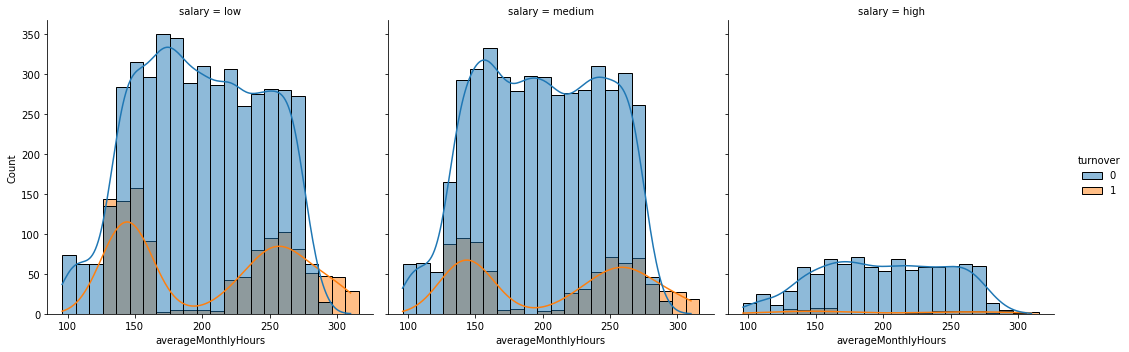

In [261]:
sns.displot(data=df, x="averageMonthlyHours", binwidth=10, kde=True, hue="turnover", col="salary")

In [254]:
df['averageMonthlyHours'].min()

96

In [255]:
df['averageMonthlyHours'].max()

310

In [247]:
#Create a Dataframe to visualize the trend between Emp Satisfaction levels and attrition rate
tempDf = pd.DataFrame({"avgSatisfactionLevels": avgSatisfactionLevels, 
        "attritionRate": attritionRate})

<AxesSubplot:xlabel='yearsAtCompany'>

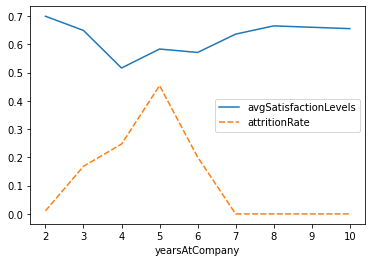

In [248]:
sns.lineplot(data=tempDf)

In [245]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


### 7.2 Employee satisfaction levels across the firm based on years spent at the firm

In [184]:
#Calcuate average satisfaction levels of Ex-Employees across number of years spent at the firm.
ExEmpSatisfaction = df.loc[df['turnover']==1,:].groupby('yearsAtCompany')['satisfaction'].mean()

In [185]:
ExEmpSatisfaction

yearsAtCompany
2    0.537419
3    0.411796
4    0.144505
5    0.708402
6    0.798440
Name: satisfaction, dtype: float64

In [186]:
#Calcuate average satisfaction levels of Employees across number of years spent at the firm.
EmpSatisfaction = df.loc[df['turnover']==0,:].groupby('yearsAtCompany')['satisfaction'].mean()

In [187]:
EmpSatisfaction

yearsAtCompany
2     0.700907
3     0.697020
4     0.637901
5     0.479121
6     0.513880
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction, dtype: float64

In [188]:
#Function to calculate attrition rate
def find_ratio(df):
    
    ratio = df['turnover'].sum()/df['turnover'].count()
    
    return ratio

In [190]:
#Calculate attrition rate across the firm
attritionRate = df.groupby(['yearsAtCompany']).apply(find_ratio)

In [191]:
attritionRate

yearsAtCompany
2     0.010653
3     0.168401
4     0.246883
5     0.453861
6     0.201107
7     0.000000
8     0.000000
10    0.000000
dtype: float64

In [193]:
#Create a Dataframe to visualize the trend between Emp Satisfaction levels and attrition rate
EmpSatisfactionData = {"ExEmpSatisfaction": satisfactionMean_1, 
        "EmpSatisfaction": satisfactionMean_0, 
        "attritionRate": attritionRate}

In [194]:
EmpSatisfactionDf = pd.DataFrame(EmpSatisfactionData)

In [195]:
EmpSatisfactionDf

,ExEmpSatisfaction,EmpSatisfaction,attritionRate
yearsAtCompany,,,
2,0.537419,0.700907,0.010653
3,0.411796,0.697020,0.168401
4,0.144505,0.637901,0.246883
5,0.708402,0.479121,0.453861
6,0.798440,0.513880,0.201107
7,NaN,0.635957,0.000000
8,NaN,0.665062,0.000000
10,NaN,0.655327,0.000000


<AxesSubplot:xlabel='yearsAtCompany'>

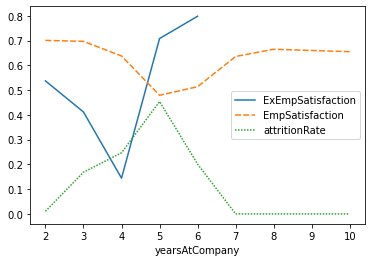

In [196]:
sns.lineplot(data=EmpSatisfactionDf)

In [212]:
df.loc[df["turnover"] == 1,"yearsAtCompany"].count()

1991

In [203]:
_

0       3
1       6
2       4
3       5
4       3
       ..
1995    3
1996    4
1997    3
1998    5
1999    3
Name: yearsAtCompany, Length: 1991, dtype: int64

### Findings so far
- Average attrition rate across the firm is 16.60% and on average employees leave the firm after 3.8 years
- Attrition rate gradually rises for employees during their initial years with the firm and peaks at 45.38%

In [173]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [15]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = df.groupby(['yearsAtCompany','turnover'])
turnover_Summary.mean()

satisfaction  evaluation  projectCount  \
yearsAtCompany turnover                                           
2              0             0.700907    0.717603      3.681834   
               1             0.537419    0.753548      3.967742   
3              0             0.697020    0.717157      3.729379   
               1             0.411796    0.522243      2.116705   
4              0             0.637901    0.720444      3.912583   
               1             0.144505    0.857798      5.981818   
5              0             0.479121    0.702362      4.215517   
               1             0.708402    0.899564      4.763485   
6              0             0.513880    0.693025      4.057737   
               1             0.798440    0.908899      4.605505   
7              0             0.635957    0.682766      3.851064   
8              0             0.665062    0.711975      3.777778   
10             0             0.655327    0.731495      3.682243   

                         averageMonthlyHours  workAccident  promotion  
yearsAtCompany turnover                                                
2              0                  199.742966      0.173324   0.013546  
               1                  209.870968      0.032258   0.000000  
3              0                  199.219416      0.169370   0.019231  
               1                  147.475973      0.052632   0.006865  
4              0                  198.607285      0.164238   0.013907  
               1                  268.856566      0.056566   0.002020  
5              0                  193.331034      0.212069   0.017241  
               1                  248.153527      0.053942   0.002075  
6              0                  200.050808      0.193995   0.025404  
               1                  241.807339      0.036697   0.000000  
7              0                  200.744681      0.138298   0.191489  
8              0                  193.802469      0.271605   0.061728  
10             0                  199.224299      0.233645   0.074766

In [16]:
df

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0,0.90,0.55,3,259,10,1,1,management,high
11996,0,0.74,0.95,5,266,10,0,1,management,high
11997,0,0.85,0.54,3,185,10,0,1,management,high
11998,0,0.33,0.65,3,172,10,0,1,marketing,high


No handles with labels found to put in legend.


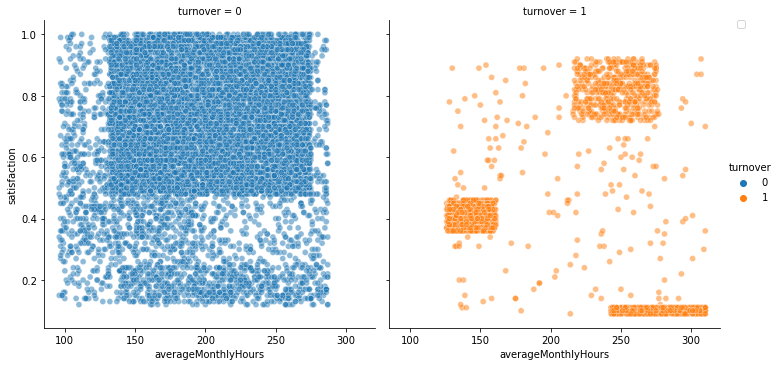

In [17]:
# Create a scatter plot
sns.relplot(data=df, x="averageMonthlyHours", y="satisfaction", hue="turnover", alpha=0.5, kind="scatter", col="turnover" )

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
df_years = df.groupby(['yearsAtCompany'])

In [19]:
df_years.describe()

turnover                                               \
                  count      mean       std  min  25%  50%  75%  max   
yearsAtCompany                                                         
2                2910.0  0.010653  0.102679  0.0  0.0  0.0  0.0  1.0   
3                5190.0  0.168401  0.374258  0.0  0.0  0.0  0.0  1.0   
4                2005.0  0.246883  0.431306  0.0  0.0  0.0  0.0  1.0   
5                1062.0  0.453861  0.498101  0.0  0.0  0.0  1.0  1.0   
6                 542.0  0.201107  0.401198  0.0  0.0  0.0  0.0  1.0   
7                  94.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
8                  81.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   
10                107.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

               satisfaction            ... workAccident      promotion  \
                      count      mean  ...          75%  max     count   
yearsAtCompany                         ...                               
2                    2910.0  0.699165  ...          0.0  1.0    2910.0   
3                    5190.0  0.648988  ...          0.0  1.0    5190.0   
4                    2005.0  0.516090  ...          0.0  1.0    2005.0   
5                    1062.0  0.583183  ...          0.0  1.0    1062.0   
6                     542.0  0.571107  ...          0.0  1.0     542.0   
7                      94.0  0.635957  ...          0.0  1.0      94.0   
8                      81.0  0.665062  ...          1.0  1.0      81.0   
10                    107.0  0.655327  ...          0.0  1.0     107.0   

                                                             
                    mean       std  min  25%  50%  75%  max  
yearsAtCompany                                               
2               0.013402  0.115009  0.0  0.0  0.0  0.0  1.0  
3               0.017148  0.129837  0.0  0.0  0.0  0.0  1.0  
4               0.010973  0.104200  0.0  0.0  0.0  0.0  1.0  
5               0.010358  0.101293  0.0  0.0  0.0  0.0  1.0  
6               0.020295  0.141138  0.0  0.0  0.0  0.0  1.0  
7               0.191489  0.395583  0.0  0.0  0.0  0.0  1.0  
8               0.061728  0.242161  0.0  0.0  0.0  0.0  1.0  
10              0.074766  0.264252  0.0  0.0  0.0  0.0  1.0  

[8 rows x 56 columns]

In [20]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.166041,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.016929
std,0.372133,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.129012
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000
50%,0.000000,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


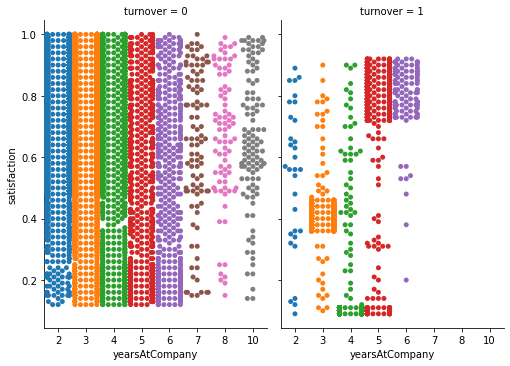

In [21]:
sns.catplot(x="yearsAtCompany", y="satisfaction",
            col="turnover", aspect=.7,
            kind="swarm", data=df)

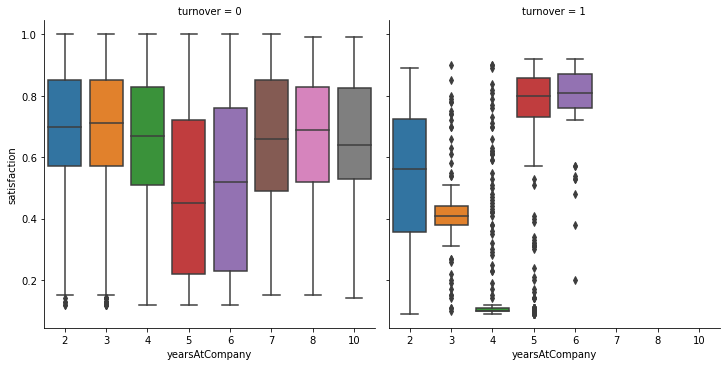

In [22]:
sns.catplot(x="yearsAtCompany", y="satisfaction", kind="box", data=df, col='turnover')

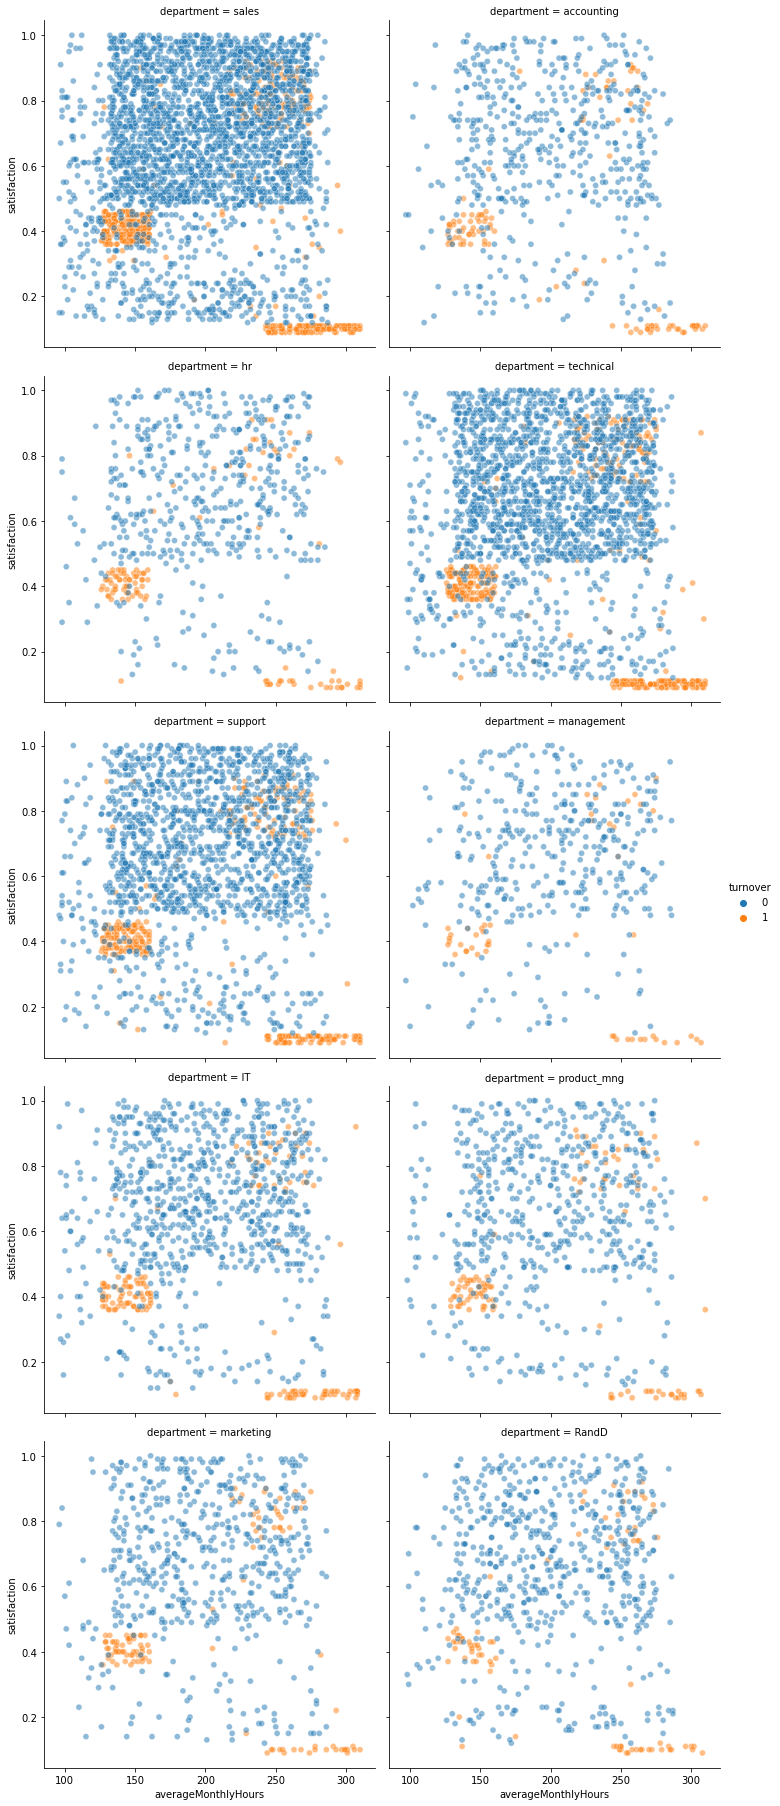

In [31]:
# Create a scatter plot
sns.relplot(data=df, x="averageMonthlyHours", y="satisfaction", hue="turnover", alpha=0.5, kind="scatter", col="department", col_wrap=2 )


In [48]:
df

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0,0.90,0.55,3,259,10,1,1,management,high
11996,0,0.74,0.95,5,266,10,0,1,management,high
11997,0,0.85,0.54,3,185,10,0,1,management,high
11998,0,0.33,0.65,3,172,10,0,1,marketing,high


<Figure size 576x288 with 0 Axes>

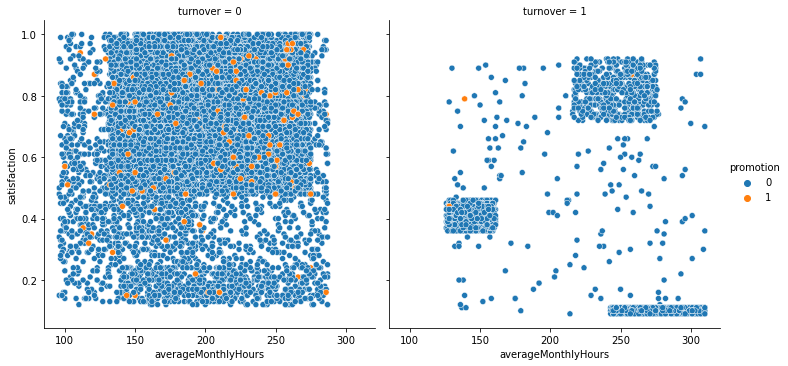

In [74]:
plt.figure(figsize=(8,4))
sns.relplot(x="averageMonthlyHours", y="satisfaction", data=df, kind="scatter", col="turnover", hue="promotion")
# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [32]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [39]:
df['promotion'].sum()/df['promotion'].count()

0.016929363689433742

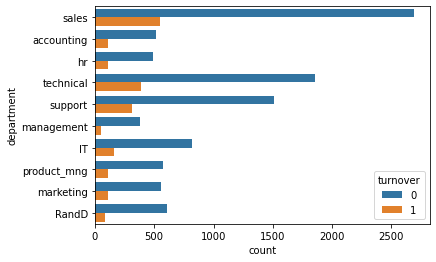

In [79]:
ax = sns.countplot(y='department', data=df, hue="turnover")
plt.show()

In [88]:
new_df = df.groupby(['department', 'turnover']).mean()

In [89]:
new_df

satisfaction  evaluation  projectCount  \
department  turnover                                           
IT          0             0.675917    0.714914      3.771394   
            1             0.417089    0.715759      3.930380   
RandD       0             0.654204    0.708309      3.822660   
            1             0.433529    0.746471      4.047059   
accounting  0             0.649082    0.723574      3.808594   
            1             0.414679    0.714037      3.954128   
hr          0             0.668135    0.724262      3.706967   
            1             0.422478    0.678673      3.539823   
management  0             0.658542    0.726745      3.804688   
            1             0.435962    0.723077      4.076923   
marketing   0             0.670784    0.722602      3.732620   
            1             0.454375    0.697589      3.660714   
product_mng 0             0.660747    0.712795      3.793403   
            1             0.467909    0.719000      3.800000   
sales       0             0.668360    0.709204      3.779844   
            1             0.450400    0.716236      3.763636   
support     0             0.672724    0.720046      3.790590   
            1             0.451506    0.737276      3.967949   
technical   0             0.669806    0.716278      3.814455   
            1             0.428897    0.736487      4.071795   

                      averageMonthlyHours  yearsAtCompany  workAccident  \
department  turnover                                                      
IT          0                  198.919315        3.256724      0.161369   
            1                  209.537975        3.835443      0.044304   
RandD       0                  199.692939        3.224959      0.183908   
            1                  212.741176        4.000000      0.082353   
accounting  0                  199.033203        3.304688      0.160156   
            1                  209.541284        3.871560      0.045872   
hr          0                  199.907787        3.151639      0.153689   
            1                  197.053097        3.707965      0.044248   
management  0                  200.705729        4.015625      0.177083   
            1                  207.615385        3.730769      0.076923   
marketing   0                  198.957219        3.329768      0.185383   
            1                  202.142857        3.883929      0.035714   
product_mng 0                  197.541667        3.227431      0.180556   
            1                  205.972727        3.936364      0.045455   
sales       0                  199.008925        3.290814      0.173671   
            1                  206.270909        3.820000      0.056364   
support     0                  199.081511        3.155070      0.186216   
            1                  208.102564        3.958333      0.057692   
technical   0                  198.284250        3.173139      0.172600   
            1                  214.574359        3.956410      0.048718   

                      promotion  
department  turnover             
IT          0          0.000000  
            1          0.012658  
RandD       0          0.034483  
            1          0.000000  
accounting  0          0.019531  
            1          0.000000  
hr          0          0.022541  
            1          0.000000  
management  0          0.091146  
            1          0.019231  
marketing   0          0.048128  
            1          0.000000  
product_mng 0          0.000000  
            1          0.000000  
sales       0          0.020454  
            1          0.005455  
support     0          0.009940  
            1          0.003205  
technical   0          0.011327  
            1          0.002564

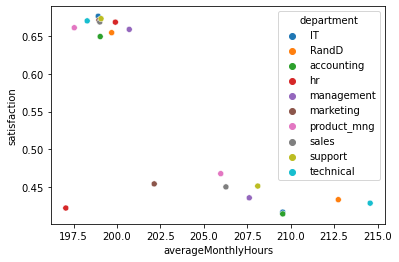

In [94]:
ax = sns.scatterplot(y='satisfaction', x="averageMonthlyHours", data=new_df, hue="department")
plt.show()

In [95]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [96]:
df['turnover'].sum()/df['turnover'].count()

0.1660411975648403

In [97]:
def find_ratio(df):
    
    ratio = df['turnover'].sum()/df['turnover'].count()
    
    return ratio

In [104]:
res = df.groupby(['yearsAtCompany']).apply(find_ratio).sort_values(ascending=False)

In [105]:
res

yearsAtCompany
5     0.453861
4     0.246883
6     0.201107
3     0.168401
2     0.010653
10    0.000000
8     0.000000
7     0.000000
dtype: float64

In [109]:
res

yearsAtCompany
5     0.453861
4     0.246883
6     0.201107
3     0.168401
2     0.010653
10    0.000000
8     0.000000
7     0.000000
dtype: float64

In [110]:
type(res)

pandas.core.series.Series

In [111]:
res.index

Int64Index([5, 4, 6, 3, 2, 10, 8, 7], dtype='int64', name='yearsAtCompany')

In [112]:
res.values

array([0.45386064, 0.24688279, 0.20110701, 0.16840077, 0.01065292,
       0.        , 0.        , 0.        ])

<AxesSubplot:xlabel='yearsAtCompany'>

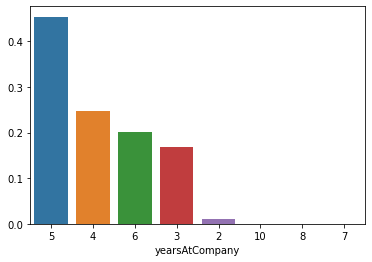

In [121]:
sns.barplot(x=res.index, y=res.values, order=res.index)

In [116]:
res.index.values

array([ 5,  4,  6,  3,  2, 10,  8,  7])

In [117]:
res.values

array([0.45386064, 0.24688279, 0.20110701, 0.16840077, 0.01065292,
       0.        , 0.        , 0.        ])

In [122]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


------

In [123]:
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [125]:
df.groupby(['turnover']).mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


<AxesSubplot:>

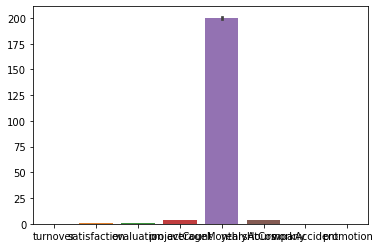

In [128]:
sns.barplot(data=df)